<a href="https://colab.research.google.com/github/peterfarrell12/BTTS_Project/blob/master/Premier_League_RFC_and_NB_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV




In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving pl_data.csv to pl_data.csv
User uploaded file "pl_data.csv" with length 110141 bytes


In [0]:
data = pd.read_csv('pl_data.csv')

# Data Exploration & Preprocessing



In [0]:
data.dropna()

In [0]:
data.head()

In [0]:
data.sample(20)

In [0]:
data.describe()

In [0]:
data.info()

In [0]:
data["Gameday"].value_counts()

In [0]:
data["Home Team"].value_counts()

In [0]:
data["Away Team"].value_counts()

In [0]:
correl = data.corr()

In [0]:
print(correl['Result'].sort_values(ascending=False))

In [0]:
def label_enc (col):
  le = preprocessing.LabelEncoder()
  x = le.fit_transform(col)

  return x

In [0]:
def clean(data):
  data = data.drop(['Season'], axis = 'columns')
  data = data[data['Gameweek'] != 1]
  data['Gameday'] = label_enc(data['Gameday'])
  data['Home Team'] = label_enc(data['Home Team'])
  data['Away Team'] = label_enc(data['Away Team'])

  return data

In [0]:
c_data = clean(data)

In [0]:
X = c_data.drop(['Result'], axis = 1)
y = c_data['Result']

In [0]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.astype(np.float64))

In [0]:
encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
print(y)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state = 42,test_size=0.2)
print("train:" ,X_train.shape,"test:",X_test.shape)

# Modelling

In [0]:
rfc_param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100,200,300,400]
}

In [0]:
def grid_search_func(estimator, param_grid):

  grid_search = GridSearchCV(estimator = estimator, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
  grid_search.fit(X_train, y_train)
  print(grid_search.best_params_)
  gd = grid_search.best_estimator_

  return gd

In [0]:
#Naive Bayes Predictor

def NB_Classifier():
  clf = GaussianNB()
  clf.fit(X_train, y_train)
  pred = cross_val_predict(rnd_clf, X_train, y_train, cv =3)
  train_accuracy = cross_val_score(clf, X_train, y_train, cv=10, scoring = "accuracy").mean()
  print('Train Accuracy: ' + str(train_accuracy))
  accuracy = accuracy_score(y_test,clf.predict(X_test))
  print("Test Accuracy: " + str(accuracy))
  print(classification_report(y_test,clf.predict(X_test)))
  create_confusion(pred, y_train)

In [0]:
#Random Forest Classifier

def RFC_Classifier():
  x = RandomForestClassifier(n_estimators = 500, max_leaf_nodes=16, n_jobs = -1)
  rnd_clf = grid_search_func(x, rfc_param_grid)
  rnd_clf.fit(X_train, y_train)
  pred = cross_val_predict(rnd_clf, X_train, y_train, cv =3)
  train_accuracy = cross_val_score(rnd_clf, X_train, y_train, cv=10, scoring = "accuracy").mean()
  print('Train Accuracy: ' + str(train_accuracy))
  test_accuracy = accuracy_score(y_test,rnd_clf.predict(X_test))
  print("Test Accuracy: " + str(test_accuracy))
  print(classification_report(y_test,rnd_clf.predict(X_test)))
  #for name,score in zip(X.columns, rnd_clf.feature_importances_):
  # print(name, score)
  create_confusion(pred, y_train)

In [0]:
#Confusion Matrix Function

def create_confusion(y_train_pred, y_train):
  data1 = confusion_matrix(y_train, y_train_pred)
  df_cm = pd.DataFrame(data1, columns=np.unique(y_train), index = np.unique(y_train))
  df_cm.index.name = 'Actual'
  df_cm.columns.name = 'Predicted'
  plt.figure(figsize = (8,5))
  sn.set(font_scale=1.4)#for label size
  sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}, fmt='g',)


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  5.9min finished


{'bootstrap': True, 'max_depth': 90, 'max_features': 3, 'min_samples_leaf': 4, 'min_samples_split': 12, 'n_estimators': 100}
Train Accuracy: 0.6457343568858926
Test Accuracy: 0.6231884057971014
              precision    recall  f1-score   support

           0       0.64      0.75      0.69       116
           1       0.00      0.00      0.00        83
           2       0.62      0.88      0.72       146

    accuracy                           0.62       345
   macro avg       0.42      0.54      0.47       345
weighted avg       0.48      0.62      0.54       345



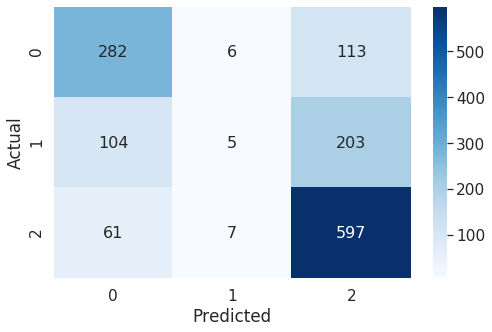

In [79]:
RFC_Classifier()

Train Accuracy: 0.6429190736362264
Test Accuracy: 0.6144927536231884
              precision    recall  f1-score   support

           0       0.62      0.75      0.68       116
           1       0.39      0.08      0.14        83
           2       0.63      0.81      0.71       146

    accuracy                           0.61       345
   macro avg       0.55      0.55      0.51       345
weighted avg       0.57      0.61      0.56       345



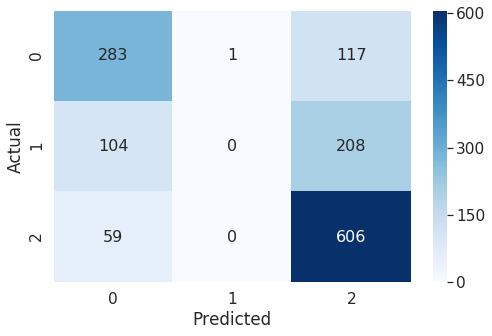

In [63]:
NB_Classifier()